# Problem Statement : 

Predict whether a person will be diagonized with diabetes or not.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import random


# Note :

"from sklearn.preprocessing import StandardScaler"

Many machine learning algorithms perform better when numerical input variables are scaled to a standard range.

Standardization scales each input variable separately by subtracting the mean (called centering) and dividing by the standard deviation to shift the distribution to have a mean of zero and a standard deviation of one.

A value is standardized as follows:

    y = (x – mean) / standard_deviation
    
    mean = sum(x) / count(x)
    
    standard_deviation = sqrt( sum( (x – mean)^2 ) / count(x))
    
Also preprocessing is used to remove bias in the model. since in the pregnancies the value goes from 6 to 256 occationally and it will create the 
bias.
  

In [3]:
# Dealing with the missing and NaN values
missing_values = [0,"NaN"]

In [4]:
# To know how many data has 0 value stored
data = pd.read_csv("diabetes.csv",na_values = missing_values)

In [5]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,1.0
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,NaN
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,NaN
4,NaN,137.0,40.0,35.0,168.0,43.1,2.288,33,1.0


<AxesSubplot:>

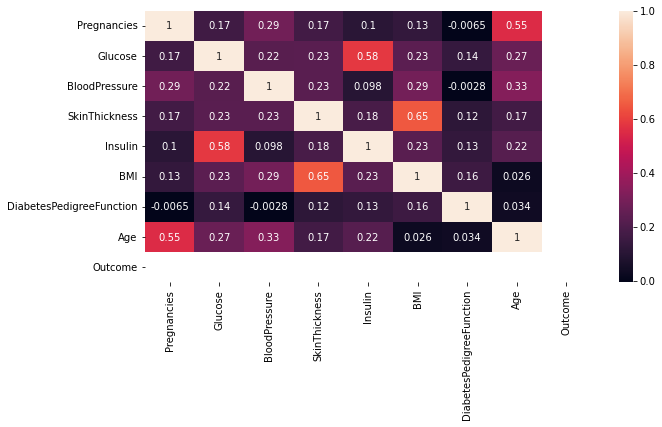

In [6]:
# Corealation between different features with the target variable i.e "Outcome"
plt.figure(figsize = (10,5))
sns.heatmap(data.corr(),annot=True)

In [7]:
data["Outcome"].value_counts()

1.0    268
Name: Outcome, dtype: int64

In [8]:
data.shape

(768, 9)

Since dataset has less amount of data, it is the perfect scenario to use K-NN algorithm.

In [9]:
# Replacing the zeros in the data for measure data values
zero_not_accepted = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']

In [10]:
data.isnull().sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

We will replace those 0 data values with the mean value for better analysis.

In [11]:
for column in zero_not_accepted:
    data[column] = data[column].replace(0,np.nan)
    mean = int(data[column].mean())
    data[column] = data[column].replace(np.nan,mean)

In [16]:
# Since we have NaN values in outcome so we will use 0 instead
data["Outcome"] = data["Outcome"].fillna(0)

In [17]:
data["Outcome"].value_counts()

0.0    500
1.0    268
Name: Outcome, dtype: int64

as we can see there is no value having NaN data value.

# Data Splitting :

In [18]:
# Splitting the data according to dependent and independent variable
X = data.iloc[:,1:8]
y = data.iloc[:,8]

In [19]:
# Splitting the train and test data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = .3)

In [20]:
X_train.shape,X_test.shape

((537, 7), (231, 7))

In [21]:
y_train.shape,y_test.shape

((537,), (231,))

Thumb Rule :
        "Any algorithm that computes distance or assumes normality ,scale your features"

In [22]:
"""Feature Scaling is a technique to standardize the independent features 
present in the data in a fixed range. 
It is performed during the data pre-processing. 
 """
# Feature scaling 
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.fit_transform(X_test)

In [23]:
X_test

array([[-0.05003849,  1.14410183,  1.22394633, ...,  1.94208055,
         0.99965131, -0.38706563],
       [-1.22608841, -0.05954987,  0.2418131 , ..., -0.46757679,
        -0.52235775,  1.16554593],
       [-0.62126274,  0.45630086,  1.34671298, ...,  0.25986694,
        -0.69808874, -0.84371608],
       ...,
       [-0.92367558, -1.95100254,  0.11904645, ..., -0.61912756,
        -0.34662676, -0.93504617],
       [ 1.26041714,  1.48800232, -0.0037202 , ..., -0.17963031,
         0.99071584,  2.99214776],
       [ 1.26041714,  0.45630086, -0.0037202 , ...,  0.0173857 ,
         0.98475886, -0.20440544]])

In [24]:
X_train

array([[ 1.62337456, -0.34656535,  2.19511506, ...,  1.44600031,
         0.6999015 , -0.43388644],
       [ 0.54774096, -0.83524525, -1.34209961, ..., -1.46235482,
        -0.80419187, -1.01327512],
       [ 0.84109558, -0.02077875,  0.64758364, ...,  0.18523552,
         0.47200856,  1.38704941],
       ...,
       [ 0.12400651,  1.28236763,  1.31081139, ...,  1.00186726,
         0.70597864, -0.51665625],
       [-0.36491785, -0.02077875, -0.12618206, ..., -1.20447111,
        -0.19647738, -0.51665625],
       [ 0.77590566, -0.02077875, -0.01564411, ..., -0.6887037 ,
        -0.70391898, -0.43388644]])

# Fitting Into The Model :

In [25]:
classifier = KNeighborsClassifier(n_neighbors = 11,metric = "euclidean")
classifier.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=11)

In [26]:
prediction = classifier.predict(X_test)

# Accuracy :

In [27]:
accuracy_score(y_test,classifier.predict(X_test))*100

77.48917748917748

In [28]:
cm = confusion_matrix(y_test,prediction)
print(cm)

[[126  21]
 [ 31  53]]


here in our predcition matrix : (1,1)&(2,2) --> correct prediction
                                (1,2),(2,1) --> wrong prediction

In [29]:
# f1 score
from sklearn.metrics import f1_score
f1_score(y_test,prediction)


0.6708860759493671

F1 score is a machine learning evaluation metric that measures a model's accuracy. It combines the precision and recall scores of a model. The accuracy metric computes how many times a model made a correct prediction across the entire dataset.

So, we have created a model using K-NN which can predict whether a person will have adiabetes or not.